In [136]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install category_encoders
import category_encoders as ce

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1a. Data Cleanup

In [257]:
#Reading the files 
train=pd.read_csv('income-testing.csv')
test=pd.read_csv('income-training.csv')

In [258]:
#Gather information regarding the columns elements and total no of elements in both test and train data
print(train.info())
print('\n=============================================================================================================================\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
Age              24421 non-null int64
WorkClass        23037 non-null object
FinalWeight      24421 non-null int64
Education        24421 non-null

###### From above it can be noted that some values in WorkClass, Occupation and Native Country are Missing in both testing and training data sets.

In [259]:
#Find the no of elements missing in each columns for test and train data
print(train.isnull().sum())
print('\n=====================================================================================================================\n')
print(test.isnull().sum())

Age                0
WorkClass        688
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       690
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry    225
IncomeBracket      0
dtype: int64


Age                 0
WorkClass        1384
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     395
IncomeBracket       0
dtype: int64


In [260]:
# We see how the elements are distributed in NativeCountry
train.NativeCountry.value_counts()

United-States                 11003
Mexico                          206
Philippines                      68
Germany                          59
Canada                           51
Puerto-Rico                      46
India                            34
Cuba                             33
China                            33
England                          31
El-Salvador                      31
Italy                            30
Dominican-Republic               29
Jamaica                          28
Guatemala                        26
South                            24
Portugal                         21
Nicaragua                        19
Japan                            18
Haiti                            18
Vietnam                          17
Columbia                         17
Iran                             13
Peru                             13
Ecuador                          12
Taiwan                           12
Poland                           11
Greece                      

###### The mode of the NativeCountry column is 'United-States' and the frequency of all other data is significantly low i.e all data combined together comprises less that 10% of the entire data. Hence, the correct approach will be to replace the missing values with 'United-States'

In [261]:
# Replace the missing data in NativeCountry by mode of the data which is United-States
train=train.set_value(train.NativeCountry.isnull(), 'NativeCountry', 'United-States')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


Mode for the WorkClass and Occupation column is "Private" and "Exec-managerial" repectively.
There are two significant observations 

#1. In Occupation column, the frequency of the variables "Exec-managerial", "Craft-repair" "Prof-specialty" are very close, Hence replacing the missing data with mode will create make the data biased. Hence the correct approach will be to delete these rows.

#2. Further, if we observe data in Occupation column and Workclass column are missing simultaneously.So when we remove data from Occupation the missing data in Woek class will automatically get removed.

In [262]:
#replacing the missing data in Workcalss by mode of the WorkClass which is Private
#train=train.set_value(train.WorkClass.isnull(), 'WorkClass', 'Private')

In [263]:
# we delete the rows corresponding to the missing elements in the Occupation Column
train = train[pd.notnull(train['Occupation'])]

In [264]:
#replacing the missing data in Workcalss by mode of the WorkClass which is Private
#test=test.set_value(test.WorkClass.isnull(), 'WorkClass', 'Private')

In [265]:
# replace the missing data in NativeCountry by mode of the data
test=test.set_value(test.NativeCountry.isnull(), 'NativeCountry', 'United-States')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [266]:
# we delete the rows corresponding to the missing elements in the Occupation Column
test = test[pd.notnull(test['Occupation'])]

In [267]:
print(train.isnull().sum())
print('\n=====================================================================================================================\n')
print(test.isnull().sum())

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
dtype: int64


Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
dtype: int64


###### we can see that we are now clear of missing values in test and train datasets

# 1b. Encoding

In [268]:
#we need the raw data to perform further analysis, hence I am just writing a function for encoding. I am using one hot encoding 
#In One hot encoding each category is converted into new columnn and and a true or false value is assigned. However in lable encoding
# each category is assigned a numeric value which may possibly confuse the algorithm.
#In this assignment encoding is done just before the model implementation 
def encode(x):
    y=pd.get_dummies(x)
    return y

# 2. Exploratory Analysis

## 2a Graphs

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


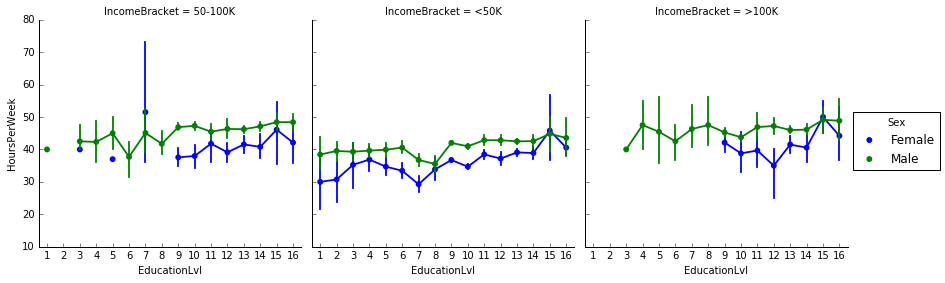

In [269]:
g = sns.factorplot('EducationLvl', 'HoursPerWeek', hue = 'Sex', col = 'IncomeBracket', data = train)

###### I have done a factor plot, from this we can note that in most cases females work for less Hours per week than Males, However they have a significant presence in all the three income brackets. Further it can be observed that respondants from all educational backgruond fall within the the three income groups, Hence we can considet these there categories important for classifying the income bracket

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


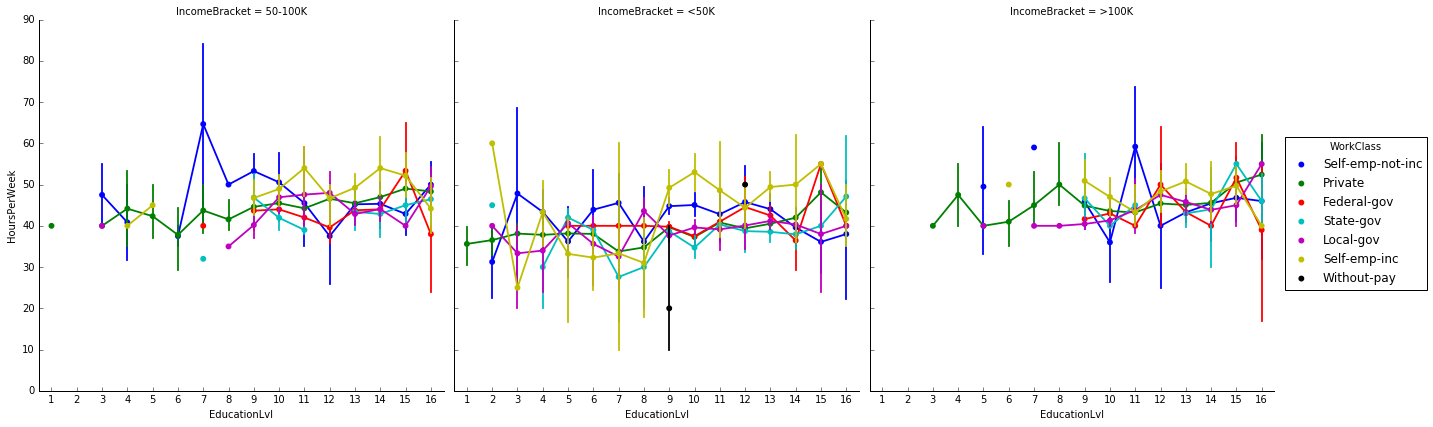

In [270]:
 g = sns.factorplot('EducationLvl', 'HoursPerWeek', hue = 'WorkClass', col = 'IncomeBracket', data = train,size=6, aspect=1)

###### When we do a factor plot again the educationlvl, hours per week and Work Class we can see that people from all the working class are all distributed among the three different income brackets, However there is a slight corelation between the workclass and EducationLvl

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


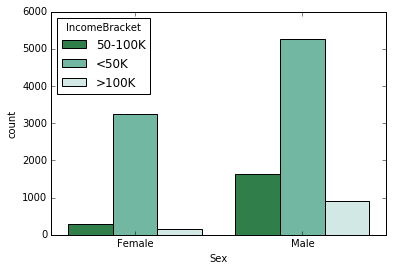

In [271]:
sns.countplot(x='Sex', hue='IncomeBracket', data=train, palette="BuGn_r")

###### The reason for this plot is to determine if Sex of the person has any impact on the income bracker, as we can observe that  about 3200 Females fall under the income category <50K and close to 1000 fall under the other two income categories which is only 23%, However among males,about 5500 fall undet the category <50K and close to 2500 fall under the other two income group which is about 33%. Hence we can draw a conclusion that gender has an impact on the IncomeBracket

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


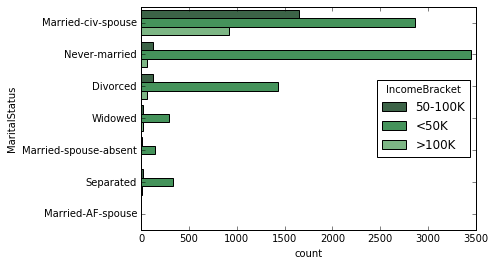

In [273]:
sns.countplot(y='MaritalStatus', hue='IncomeBracket', data=train, palette="Greens_d")

#plot relating the MaritalStatus and IncomeBracket

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


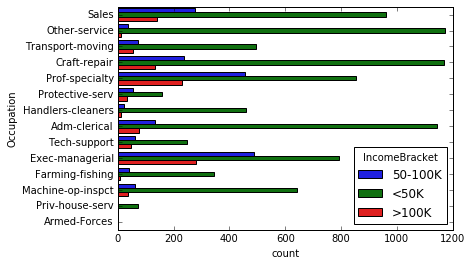

In [274]:
sns.countplot(y='Occupation', hue='IncomeBracket', data=train)
#Plot relating the Occupation and IncomeBracket

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


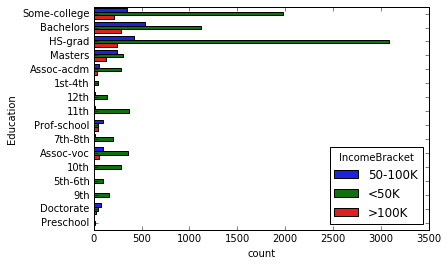

In [275]:
sns.countplot(y='Education', hue='IncomeBracket', data=train)
#Plot Relating Education and IncomeBracket

## 2.b Correlation

In [276]:
#converts the IncomeBracket(Target Variable) in train data to 0, 1 or 2
train.IncomeBracket.replace({'<50K':0,'50-100K':1,'>100K':2 }, inplace = True)

In [277]:
#converts the IncomeBracket (Target Variable) in test data to 0, 1 or 2
test.IncomeBracket.replace({'<50K':0,'50-100K':1,'>100K':2 }, inplace = True)

In [278]:
train.corr()
#we have plotted a covariance matrix for the available numerical data, we just need to find the corelation between the all features with that of the Income Bracket

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket
Age,1.000000,-0.072312,0.037492,0.093979,0.050851,0.089963,0.226847
FinalWeight,-0.072312,1.000000,-0.035815,0.002784,-0.015769,-0.021877,-0.015717
EducationLvl,0.037492,-0.035815,1.000000,0.122091,0.090433,0.142333,0.290924
CapitalGain,0.093979,0.002784,0.122091,1.000000,-0.033391,0.072879,0.201353
CapitalLoss,0.050851,-0.015769,0.090433,-0.033391,1.000000,0.052120,0.148745
HoursPerWeek,0.089963,-0.021877,0.142333,0.072879,0.052120,1.000000,0.199912
IncomeBracket,0.226847,-0.015717,0.290924,0.201353,0.148745,0.199912,1.000000


In [279]:
#Correlation with respect to IncomeBracket
train.corr().IncomeBracket

Age              0.226847
FinalWeight     -0.015717
EducationLvl     0.290924
CapitalGain      0.201353
CapitalLoss      0.148745
HoursPerWeek     0.199912
IncomeBracket    1.000000
Name: IncomeBracket, dtype: float64

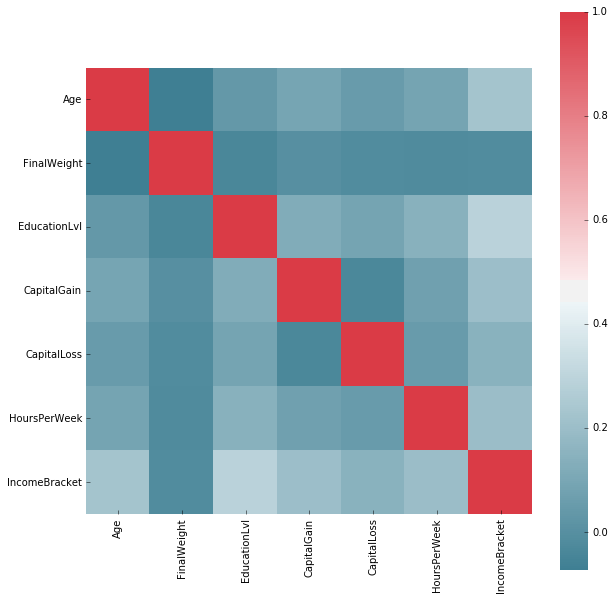

In [281]:
#We plot a heatmap to visualize the corelation between the features and the target 
f, ax = plt.subplots(figsize=(10, 10))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# 3. Feature Selection

In [283]:
#Since the most dominant variable in NativeCountry is United states and accounts for the 90 % of the data, 
#we classify the remaining countries as other
#This will help while encoding, the dimensionality of the dataset will reduce 
train['NativeCountry']=['United-States' if i == 'United-States' else 'Other' for i in train['NativeCountry']]
print(train['NativeCountry'].value_counts())

United-States    10594
Other              927
Name: NativeCountry, dtype: int64


In [284]:
#Do the same for test data
test['NativeCountry']=['United-States' if j == 'United-States' else 'Other' for j in test['NativeCountry']]
print(test['NativeCountry'].value_counts())

United-States    21096
Other             1935
Name: NativeCountry, dtype: int64


In [285]:
train.WorkClass.value_counts()

Private             8426
Self-emp-not-inc     989
Local-gov            792
State-gov            488
Self-emp-inc         444
Federal-gov          378
Without-pay            4
Name: WorkClass, dtype: int64

Looking at the dirstibution of the variables the WorkClass can be divided into three catogery, Private, Government, SelfEmployed and Others

In [286]:
#Function for categorising the WorkClass variables
import re
def workclas(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'

In [287]:
#categorising the Workclass column as WorkClass_cat in train and test set
train['WorkClass_cat']=train.WorkClass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))
test['WorKClass_cat']=test.WorkClass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))

In [288]:
#Work calss is divided into four classes (Private, Gov, Selfempl and Others)
train['WorkClass_cat'].value_counts()

Private     8426
gov         1658
selfempl    1433
others         4
Name: WorkClass_cat, dtype: int64

In [289]:
print(test.shape)
print(train.shape)

(23031, 16)
(11521, 16)


In [290]:
#We delete the initial column of the WorkClass in both train and test data
train=train.drop('WorkClass',1)
test=test.drop('WorkClass',1)

In [291]:
print(test.shape)
print(train.shape)

(23031, 15)
(11521, 15)


In [292]:
#Addition of new feature - NetCapitalGain which is CapitalGain - CapitalLoss(From the definition)
train['NetCapitalGain']=train.CapitalGain-train.CapitalLoss
test['NetCapitalGain']=test.CapitalGain-test.CapitalLoss

In [293]:
print(test.shape)
print(train.shape)

(23031, 16)
(11521, 16)


In [294]:
#Since we have added the few feature by combining the othe two exisitng features, we can delete them
train = train.drop('CapitalGain', 1)
train=train.drop('CapitalLoss',1)
test=test.drop('CapitalGain',1)
test=test.drop('CapitalLoss',1)

In [295]:
print(test.shape)
print(train.shape)

(23031, 14)
(11521, 14)


In [296]:
# Futher the EducationLvl is just a numeric indicator of Education, Hence I am deleting the Education feature in test and train data
train=train.drop('Education',1)

In [297]:
test=test.drop("Education",1)

In [298]:
print(test.shape)
print(train.shape)

(23031, 13)
(11521, 13)


# 4. Model Implementation

##  4a. Logistic Regression

In [299]:
#We are Encoding Now

In [300]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [301]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score

In [302]:
y=train.IncomeBracket #Target Value
X=train.drop(['IncomeBracket'],axis=1) #Feature Variable
X_train,  X_test, y_train, y_test=train_test_split(X,y, random_state=21, test_size=0.20) #Spliting the scores between testing and trainig set

In [303]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9216, 45)
(9216,)
(2305, 45)
(2305,)


In [304]:
#implementing the logistic regression model
lg = LogisticRegression()
model=lg.fit(X_train, y_train)

In [305]:
#Calculating the accuracy scores without using cross validation
yscore=lg.predict(X_test)
print(accuracy_score(y_test, yscore))

0.757917570499


In [306]:
#Cross Validation for logistic regression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [307]:
#Printing Cross Validated Scores
scores = cross_val_score(model, X, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [ 0.75628794  0.76409367  0.75715525  0.75802255  0.75888985  0.76041667
  0.75694444  0.75847089  0.75586447  0.76086957]


In [308]:
#Mean Scores 
np.mean(scores)

0.75870152996772544

## 4b. Decision Tree

In [310]:
#Importing Necessary Libraries
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [311]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [312]:
#accuracy scores withour cross validation
accuracy_score(y_test, dtree.predict(X_test))

0.73275488069414318

In [313]:
#cross validated accuracy scores
score = cross_val_score(dtree, X, y, cv=10)
print('Cross-validated scores:', score)
print('Mean Accuracy:', np.mean(score))

Cross-validated scores: [ 0.72853426  0.72766696  0.72593235  0.71465742  0.72679965  0.71267361
  0.69184028  0.72371851  0.72458732  0.71565217]
Mean Accuracy: 0.719206251696


In [314]:
from sklearn.cross_validation import KFold

def run_kfold(dtree):
      
    kf = KFold(11521, n_folds=10)
    
    AScore = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        dtree.fit(X_train, y_train)
        predictions = dtree.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        AScore.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean = np.mean(AScore)
    print("Mean Accuracy: {0}".format(mean)) 
    variance = np.var(AScore)
    print('variance: ' ,variance)


run_kfold(dtree)

Fold 1 accuracy: 0.7328707718993929
Fold 2 accuracy: 0.7248263888888888
Fold 3 accuracy: 0.7204861111111112
Fold 4 accuracy: 0.7005208333333334
Fold 5 accuracy: 0.7300347222222222
Fold 6 accuracy: 0.7170138888888888
Fold 7 accuracy: 0.6961805555555556
Fold 8 accuracy: 0.7196180555555556
Fold 9 accuracy: 0.7291666666666666
Fold 10 accuracy: 0.7048611111111112
Mean Accuracy: 0.7175579105232727
variance:  0.000149932508632


## 4c. Gradient Boosting

In [356]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [357]:
mod=gb.fit(X_train, y_train)

In [316]:
#Accuracy without cross validation
accuracy_score(y_test, gb.predict(X_test))

0.78134490238611709

In [318]:
#Crossvalidated accuracy
scores = cross_val_score(mod, X, y, cv=10)
print('Cross-validated scores:', scores)
print('Mean Accuracy:', np.mean(scores))

Cross-validated scores: [ 0.79358196  0.78664354  0.79791847  0.79184735  0.8065915   0.796875
  0.78732639  0.80625543  0.80538662  0.79826087]
Mean Accuracy: 0.797068713625


In [319]:
from sklearn.cross_validation import KFold

def run_kfold(gb):
    
  
    kf = KFold(11521, n_folds=10)
    
    AScores = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        gb.fit(X_train, y_train)
        predictions = gb.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        AScores.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean = np.mean(AScores)
    print("Mean Accuracy: {0}".format(mean)) 
    variance = np.var(AScores)
    print('variance: ' ,variance)


run_kfold(gb)

Fold 1 accuracy: 0.797918473547268
Fold 2 accuracy: 0.7934027777777778
Fold 3 accuracy: 0.7838541666666666
Fold 4 accuracy: 0.8029513888888888
Fold 5 accuracy: 0.8029513888888888
Fold 6 accuracy: 0.7986111111111112
Fold 7 accuracy: 0.7899305555555556
Fold 8 accuracy: 0.8046875
Fold 9 accuracy: 0.8116319444444444
Fold 10 accuracy: 0.7890625
Mean Accuracy: 0.7975001806880602
variance:  6.43700872098e-05


## 4d. Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [322]:
#Accuracy without cross validation
accuracy_score(y_test, rf.predict(X_test))

0.76312364425162693

In [323]:
#Crossvalidated accuracy
scores = cross_val_score(rf, X, y, cv=10)
print('Cross-validated scores:', scores)
print('Mean Accuracy:', np.mean(scores))

Cross-validated scores: [ 0.78317433  0.75281873  0.76756288  0.76496097  0.7745013   0.76649306
  0.76041667  0.76542137  0.77497828  0.7626087 ]
Mean Accuracy: 0.767293628371


In [324]:
from sklearn.cross_validation import KFold

def run_kfold(rf):
    
  
    kf = KFold(11521, n_folds=10)
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        rf.fit(X_train, y_train)
        predictions = rf.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    variance = np.var(outcomes)
    print('variance: ' ,variance)

run_kfold(rf)

Fold 1 accuracy: 0.7710320901994796
Fold 2 accuracy: 0.765625
Fold 3 accuracy: 0.7734375
Fold 4 accuracy: 0.7786458333333334
Fold 5 accuracy: 0.7717013888888888
Fold 6 accuracy: 0.7595486111111112
Fold 7 accuracy: 0.7647569444444444
Fold 8 accuracy: 0.7734375
Fold 9 accuracy: 0.7604166666666666
Fold 10 accuracy: 0.7612847222222222
Mean Accuracy: 0.7679886256866146
variance:  3.8554504536e-05


## 4e. SVM

In [325]:
from sklearn import svm
sv=svm.SVC()
sv.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [326]:
accuracy_score(y_test, sv.predict(X_test))

0.73796095444685461

In [327]:
#Crossvalidated accuracy
scores = cross_val_score(sv, X, y, cv=3)
print('Cross-validated scores:', scores)
print('Mean Accuracy:', np.mean(scores))

Cross-validated scores: [ 0.73763665  0.73697917  0.73795259]
Mean Accuracy: 0.737522802022


# 5. Model Tuning

## 5a. Logistic Regression

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
#initiating the model
lg = LogisticRegression(random_state=42, penalty='l1')

In [342]:
#the parameter that we want to choose from 
parameters = {'C':[0.1,0.2,0.4,0.5,0.6]}

In [343]:
acc_scorer_lg = make_scorer(accuracy_score)

In [344]:
#Grid searching 
grid_obj_lg = GridSearchCV(lg, parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

In [345]:
#Finding the best model based on gridsearched
lg = grid_obj_lg.best_estimator_

In [346]:
#Fitting the model based in the best estimator
lg.fit(X_train, y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [348]:
#Finding the accuracy scores
accuracy_score(y_test, lg.predict(X_test))

0.77006507592190887

In [381]:
#The confusion matrix
sklearn.metrics.confusion_matrix(y_test, lg.predict(X_test))

array([[1612,   95,    0],
       [ 228,  163,    0],
       [ 126,   81,    0]])

## 5b.Decision Tree

In [349]:
#initiating the model
dt=DecisionTreeClassifier()

In [350]:
#the parameter that we want to choose from 
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5,10, 20],
              "max_depth": [None, 2, 5, 7,10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [351]:
acc_scorer_dt = make_scorer(accuracy_score)

In [352]:
#Grid Searching algorithm
grid_obj_dt = GridSearchCV(dt, parameters, scoring=acc_scorer_dt)
grid_obj_dt = grid_obj_dt.fit(X_train, y_train)

In [353]:
#Finding the best model based on gridsearched
dt = grid_obj_dt.best_estimator_

In [354]:
#Fitting the model based in the best estimator
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [355]:
accuracy_score(y_test, dt.predict(X_test))

0.77613882863340566

In [380]:
#The confusion matrix
sklearn.metrics.confusion_matrix(y_test, dt.predict(X_test))

array([[1602,  105,    0],
       [ 204,  187,    0],
       [ 100,  107,    0]])

## 5c. Gradient Boosing

In [358]:
#initiating the model
gb = GradientBoostingClassifier()

In [359]:
#the parameter that we want to choose from 
parameters = {'learning_rate': [0.1, 0.05, 0.02],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20,30, 40,],
              'max_features': [1.0, 0.3, 0.1] 
              }           

In [360]:
acc_scorer_gb = make_scorer(accuracy_score)

In [361]:
#Grid Searching algorithm
grid_obj_gb = GridSearchCV(gb, parameters, scoring=acc_scorer_gb)
grid_obj_gb = grid_obj_gb.fit(X_train, y_train)

In [362]:
#Finding the best model based on gridsearched
gb = grid_obj_gb.best_estimator_

In [363]:
#Fitting the model based in the best estimator
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [364]:
accuracy_score(y_test, gb.predict(X_test))

0.78394793926247286

In [379]:
#The confusion matrix
sklearn.metrics.confusion_matrix(y_test, gb.predict(X_test))

array([[1635,   71,    1],
       [ 217,  169,    5],
       [ 115,   89,    3]])

## 5d. Random Forest

In [365]:
#initiating the model
rf = RandomForestClassifier()

In [366]:
#the parameter that we want to choose from 
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [367]:
acc_scorer = make_scorer(accuracy_score)

In [368]:
#Grid Searching algorithm
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

In [369]:
#Finding the best model based on gridsearched
rf = grid_obj.best_estimator_

In [370]:
#Fitting the model based in the best estimator
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [371]:
predict=rf.predict(X_test)

In [372]:
accuracy_score(y_test, predictions)

0.77527114967462041

In [378]:
#The confusion matrix
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[1600,  106,    1],
       [ 203,  187,    1],
       [  99,  108,    0]])

# 6 Testing

###### Since we achieved highest accuracy in Gradient Boosing, we use gradient boosing to predict out testing set

In [373]:
b = test.IncomeBracket #Target Variable
a = test.drop(['IncomeBracket'],axis=1)#Feature Variables
accuracy_score(b, gb.predict(a))#Predicting the accuracy scores

0.8062611263080196

###### We got an accuracy of 80.6% which is higher that the traing set where we achieved 78.3% by grid search and average score of 79.1% using grid search by this we can say that our model performed well

In [377]:
sklearn.metrics.confusion_matrix(b,gb.predict(a))

array([[16715,   460,     5],
       [ 2025,  1824,    55],
       [  994,   923,    30]])

In [374]:
gb.predict(a)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)